Loading Movielens Dataset

In [1]:
import pandas as pd
ratings_column=["userid","movieid","rating","timestamp"]
ratings = pd.read_csv("ml-100k/u.data",sep="\t",names=ratings_column,parse_dates=True)
items_column=["movieid","title","release_date","video_release_date","IMDb_URL","unknown","Action","Adventure","Animation",
              "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy","FilmNoir","Horror","Musical","Mystery", "Romance","SciFi",
              "Thriller","War","Western" ]
items = pd.read_csv("ml-100k/u.item",sep="|",names=items_column,parse_dates=True)
users_column=["userid" ,"age","gender", "occupation" , "zip code"]
users = pd.read_csv("ml-100k/u.user",sep="|",names=users_column,parse_dates=True)


In [2]:
import numpy as np

In [3]:
ratings.head()

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
users.head()

,userid,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
items.head()

,movieid,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Task 1) EDA

In [6]:
ratings.dtypes

userid       int64
movieid      int64
rating       int64
timestamp    int64
dtype: object

In [7]:
users.dtypes

userid         int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [8]:
items.dtypes

movieid                 int64
title                  object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
FilmNoir                int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
SciFi                   int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

All the genres are in equal number.

In [9]:
import seaborn as sns
import matplotlib
%matplotlib inline

In [10]:
df=items.drop(["movieid" ,"title","release_date","video_release_date","IMDb_URL"],axis=1)

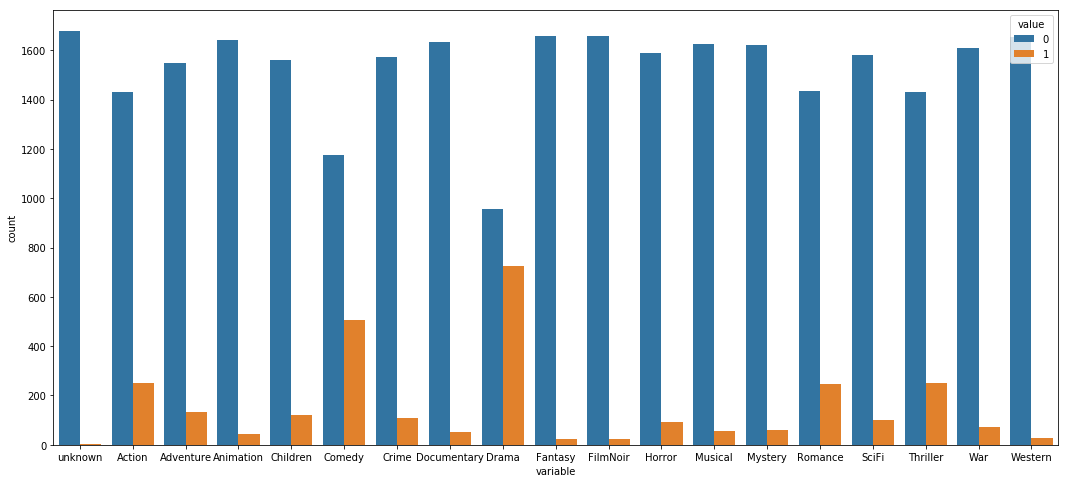

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

Most of the movies are from Drama, Comedy, Action, Romance and Thriller. Most of the movies have known genres.

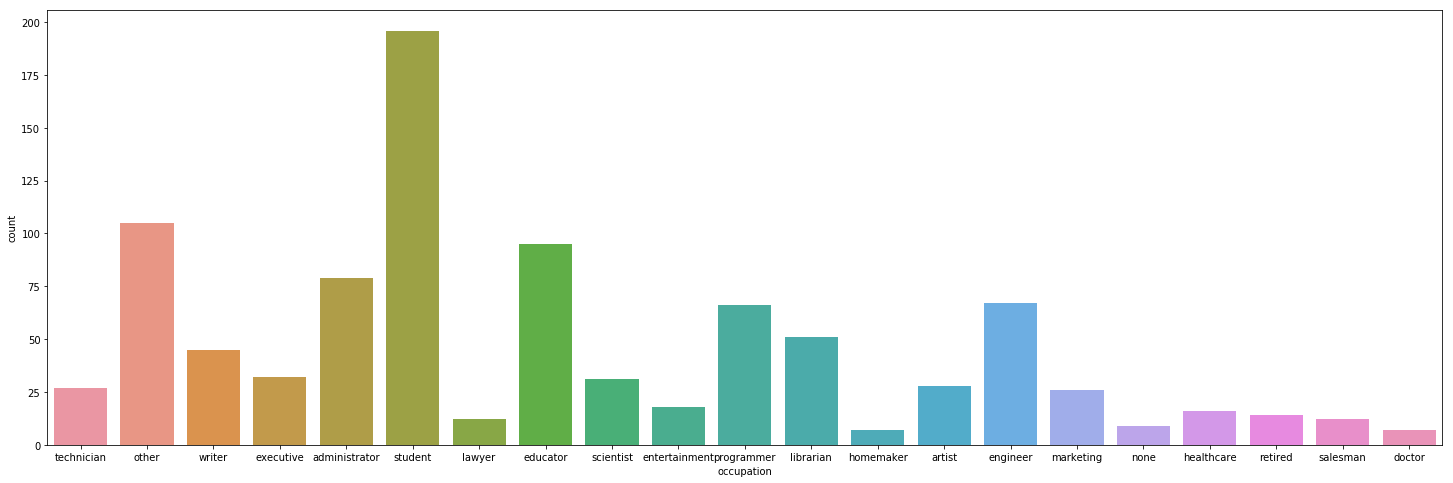

In [12]:
plt.figure(figsize=(25,8))
sns.countplot(x="occupation", data=users)

Most of the movie viewers are students followed by educator, administrator, programmer, engineer and others.

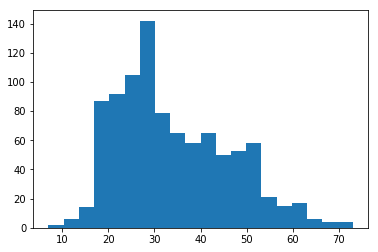

In [13]:
plt.hist(users.age,bins=20)
plt.show()

In [14]:
print("The maximum age of the user is "+str(users.age.max()))
print("The minimum age of the user is "+str(users.age.min()))

The maximum age of the user is 73
The minimum age of the user is 7


Most of the users are in the group of 20-30. There is no outlier in case of age.

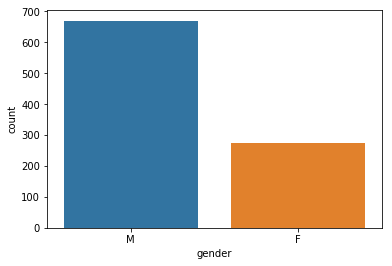

In [15]:
sns.countplot(x="gender", data=users)

A large population of users are male.

In [16]:
print("The maximum release date is "+str(items.release_date.max()))

The maximum release date is 4-Feb-1971


The data given is quite old.

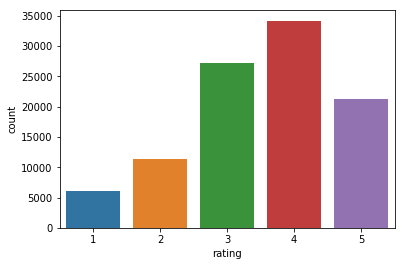

In [17]:
sns.countplot(x="rating", data=ratings)

In [18]:
users_ratings = pd.merge(users, ratings)

In [19]:
users_ratings.head()

,userid,age,gender,occupation,zip code,movieid,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


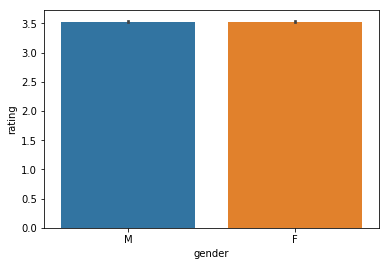

In [20]:
sns.barplot(x='gender',y='rating',data=users_ratings)

Both male and female users rate equally on an average.

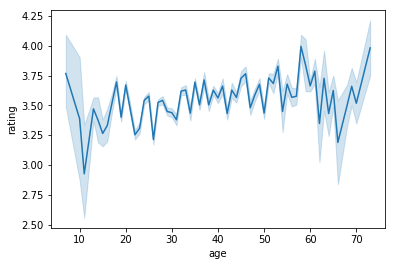

In [21]:
sns.lineplot(x='age',y='rating',data=users_ratings)

There is no general trend between age and rating.

In [22]:
users_ratings_items=pd.merge(users_ratings,items)

In [23]:
users_ratings_items.head()

,userid,age,gender,occupation,zip code,movieid,rating,timestamp,title,release_date,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x=users_ratings_items[users_ratings_items['gender']=='F']

In [25]:
genres=['unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller',
       'War', 'Western']
df=x[genres]

In [26]:
df.head()

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


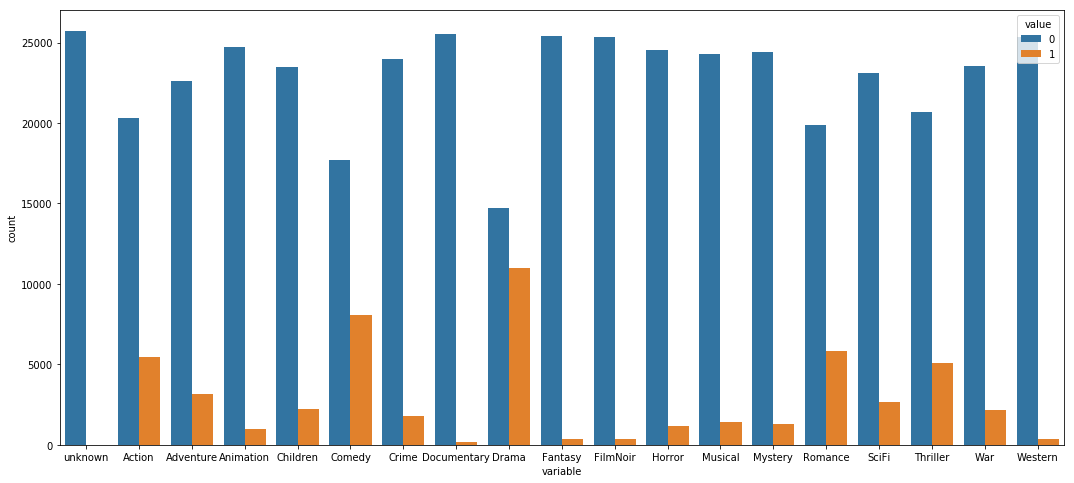

In [27]:
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

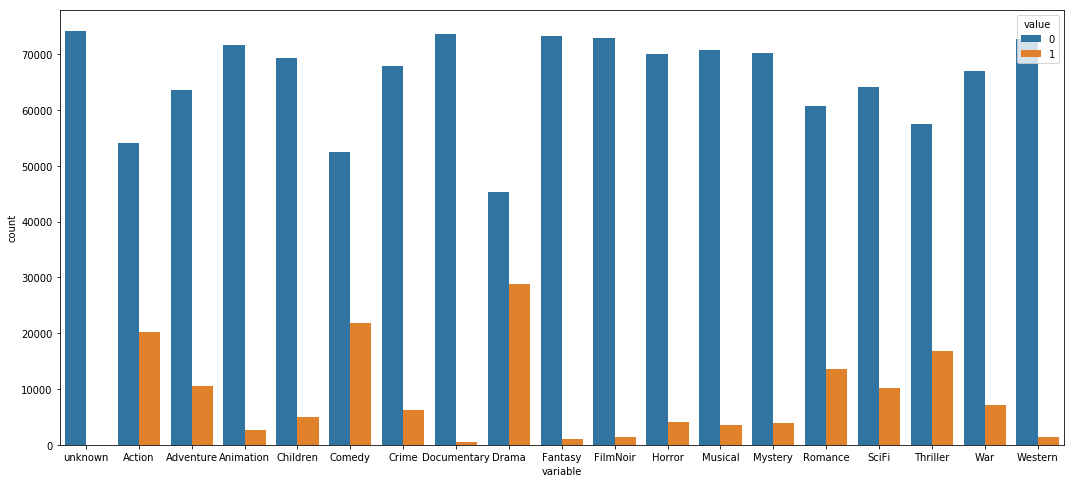

In [28]:
y=users_ratings_items[users_ratings_items['gender']=='M']
df=y[genres]
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

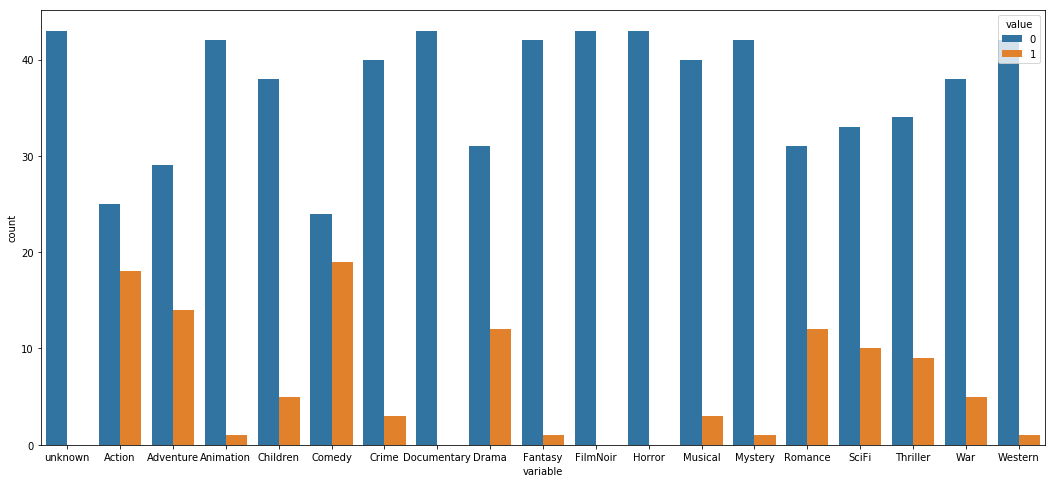

In [29]:
age=users_ratings_items[users_ratings_items['age']<10]
df=age[genres]
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

In [30]:
ratings_items=pd.merge(ratings,items)

In [31]:
ratings_items.head()

,userid,movieid,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
ratings_items.sort_values('rating',ascending=False)[:100]['title'].unique()

array(['Twelve Monkeys (1995)', 'Platoon (1986)', 'U Turn (1997)',
       'Angels in the Outfield (1994)', 'Cape Fear (1991)',
       "Young Poisoner's Handbook, The (1995)", 'Apostle, The (1997)',
       'Tombstone (1993)', 'Addicted to Love (1997)', 'Relic, The (1997)'],
      dtype=object)

The above is the list of movies that have received the highest ratings.

# Task 2) Memory-Based Method

In [33]:
movie_matrix = ratings_items.pivot_table(index='userid', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


### User-based collaborative filtering

In [34]:
user_movie_matrix=movie_matrix.copy()

In [35]:
user_movie_matrix = user_movie_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

In [36]:
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userid,,,,,,,,,,,,,,,,,,,,,
1,3.605166,3.605166,2.000000,5.000000,3.605166,3.605166,3.000000,4.000000,3.605166,3.605166,...,3.605166,3.605166,3.605166,5.000000,3.000000,3.605166,3.605166,3.605166,4.000000,3.605166
2,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,1.000000,3.704918,...,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918,3.704918
3,2.773585,2.773585,2.773585,2.773585,2.000000,2.773585,2.773585,2.773585,2.773585,2.773585,...,2.773585,2.773585,2.773585,2.773585,2.773585,2.773585,2.773585,2.773585,2.773585,2.773585
4,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,...,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333
5,2.874286,2.874286,2.000000,2.874286,2.874286,2.874286,2.874286,4.000000,2.874286,2.874286,...,2.874286,2.874286,2.874286,4.000000,2.874286,2.874286,2.874286,2.874286,4.000000,2.874286


In [37]:
correlation_matrix_users=user_movie_matrix.T.corr()

In [38]:
correlation_matrix_users.head()

userid,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
userid,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.044104,0.010664,0.059305,0.135339,0.106127,0.111336,0.181713,0.012375,-0.000432,...,0.026667,-0.048283,0.086379,0.008865,0.074706,0.085360,0.067589,0.028948,-0.031210,0.032650
2,0.044104,1.000000,0.013084,-0.016534,0.036012,0.095488,0.089508,0.055816,0.027501,0.097813,...,0.010992,-0.028588,0.057017,0.197484,0.090508,0.032142,0.015416,-0.017258,0.012663,0.039392
3,0.010664,0.013084,1.000000,-0.059226,0.016495,-0.018523,0.015242,0.040865,-0.010518,0.022886,...,0.002860,0.000739,-0.007139,0.034194,-0.017621,-0.005197,-0.024846,0.035255,-0.009382,0.001531
4,0.059305,-0.016534,-0.059226,1.000000,0.007373,-0.054239,-0.025692,0.136046,0.016082,-0.013588,...,0.017906,0.002174,-0.027924,-0.023177,0.022882,-0.007463,0.279818,0.258594,0.065001,-0.019222
5,0.135339,0.036012,0.016495,0.007373,1.000000,0.038093,0.068113,0.140106,0.010195,0.014335,...,0.070772,-0.070821,0.024353,0.039472,0.093567,0.055093,0.029540,0.036234,0.044061,0.099324


In [39]:
user_1=correlation_matrix_users[1]

In [40]:
user_1=user_1.sort_values(ascending=False)

In [41]:
user_1

userid
1      1.000000
773    0.205600
868    0.203135
592    0.196674
880    0.192026
429    0.191592
276    0.187392
457    0.183862
916    0.182078
8      0.181713
222    0.180895
660    0.179907
344    0.178818
757    0.177061
363    0.176384
479    0.175391
566    0.174032
550    0.173884
13     0.173033
661    0.171852
246    0.171498
303    0.171478
886    0.170590
648    0.167569
92     0.166154
933    0.166033
94     0.164586
44     0.164510
102    0.164426
487    0.164236
         ...   
101   -0.038770
636   -0.038774
912   -0.038936
371   -0.039548
607   -0.039616
312   -0.041243
739   -0.041489
190   -0.041935
914   -0.042331
589   -0.042854
372   -0.043525
855   -0.043819
459   -0.044712
38    -0.045004
798   -0.047035
935   -0.048283
98    -0.051037
316   -0.051575
673   -0.053339
505   -0.053520
228   -0.056355
265   -0.056391
388   -0.058185
36    -0.058249
734   -0.065644
471   -0.069329
904   -0.071934
19    -0.072106
712   -0.072317
358   -0.076429
Name: 1, Length: 

In [42]:
user_1.dropna(inplace = True)

In [43]:
top100_corr_users = user_1[1:101]

In [44]:
top100_corr_users

userid
773    0.205600
868    0.203135
592    0.196674
880    0.192026
429    0.191592
276    0.187392
457    0.183862
916    0.182078
8      0.181713
222    0.180895
660    0.179907
344    0.178818
757    0.177061
363    0.176384
479    0.175391
566    0.174032
550    0.173884
13     0.173033
661    0.171852
246    0.171498
303    0.171478
886    0.170590
648    0.167569
92     0.166154
933    0.166033
94     0.164586
44     0.164510
102    0.164426
487    0.164236
738    0.163895
         ...   
177    0.132918
600    0.132484
892    0.131961
804    0.131194
488    0.130912
472    0.130402
453    0.130302
561    0.129944
758    0.128437
117    0.128342
823    0.128245
301    0.127519
17     0.127175
297    0.126863
533    0.126211
697    0.126161
803    0.125883
254    0.125878
484    0.125681
449    0.125505
870    0.125297
425    0.123574
463    0.123274
210    0.123003
194    0.122772
468    0.122185
291    0.120206
345    0.119807
826    0.119569
398    0.118894
Name: 1, Length: 

In [47]:
ratings_items[(ratings_items['title']=="187 (1997)")]

,userid,movieid,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
90092,303,330,3,879552065,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90093,181,330,1,878961668,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90094,3,330,2,889237297,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90095,458,330,3,889324461,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90096,510,330,2,887667808,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90097,489,330,4,891445277,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90098,537,330,2,886029488,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90099,141,330,1,886447735,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90100,628,330,5,880777096,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0
90101,592,330,3,882607606,187 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?187+(1997),0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
users=list()
for user in top100_corr_users.keys():
    if ratings_items[(ratings_items['userid']==user) & (ratings_items['title']=="187 (1997)")]['rating'].sum():
        users.append(user)
print(len(users))

4


In [49]:
#Predicted rating = sum of [ (weights) * (ratings) ] / sum of (weights)
def predict(title):
    sum_of_weights=0
    rating=0
    users=list()
    for user in top100_corr_users.keys():
        if ratings_items[(ratings_items['userid']==user) & (ratings_items['title']==title)]['rating'].sum():
            users.append(user)
    for user in users:
        rating+=top100_corr_users[user]*ratings_items[(ratings_items['userid']==user) & (ratings_items['title']==title)]['rating'].sum()
        sum_of_weights+=top100_corr_users[user]
    return rating/sum_of_weights

In [50]:
print(predict("Toy Story (1995)"))

3.914978752498505


### Item-based collaborative filtering

In [88]:
import pandas as pd
ratings_column=["userid","movieid","rating","timestamp"]
ratings = pd.read_csv("ml-100k/u.data",sep="\t",names=ratings_column,parse_dates=True)
items_column=["movieid","title","release_date","video_release_date","IMDb_URL","unknown","Action","Adventure","Animation",
              "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy","FilmNoir","Horror","Musical","Mystery", "Romance","SciFi",
              "Thriller","War","Western" ]
items = pd.read_csv("ml-100k/u.item",sep="|",names=items_column,parse_dates=True)
ratings_items=pd.merge(ratings,items)
movie_matrix = ratings_items.pivot_table(index='userid', columns='title', values='rating')
item_movie_matrix=movie_matrix.copy()
item_movie_matrix = item_movie_matrix.apply(lambda row: row.fillna(row.mean()), axis=0)
correlation_matrix_item=item_movie_matrix.corr()
def top_10_similar_movie(title):    
    toystory_corr=correlation_matrix_item[title]
    toystory_corr=toystory_corr.sort_values(ascending=False)
    df=pd.DataFrame(ratings_items.groupby('title')['rating'].count())
    movies_similar_to_toy_story=list()
    for x in toystory_corr.keys():
        if df['rating'][x]>100:
            movies_similar_to_toy_story.append(x)
    movies_similar_to_toy_story=movies_similar_to_toy_story[1:]
    print(movies_similar_to_toy_story[:20])
    
top_10_similar_movie("Toy Story (1995)")

['Beauty and the Beast (1991)', 'Aladdin (1992)', 'Craft, The (1996)', 'Lion King, The (1994)', 'That Thing You Do! (1996)', 'Raiders of the Lost Ark (1981)', 'Apollo 13 (1995)', 'Jurassic Park (1993)', 'E.T. the Extra-Terrestrial (1982)', 'Down Periscope (1996)', 'Liar Liar (1997)', 'Ransom (1996)', 'Top Gun (1986)', 'Indiana Jones and the Last Crusade (1989)', 'Long Kiss Goodnight, The (1996)', 'Dumbo (1941)', 'Mission: Impossible (1996)', 'Mask, The (1994)', 'Wizard of Oz, The (1939)', 'Back to the Future (1985)']


In [51]:
item_movie_matrix=movie_matrix.copy()
item_movie_matrix = item_movie_matrix.apply(lambda row: row.fillna(row.mean()), axis=0)
correlation_matrix_item=item_movie_matrix.corr()
correlation_matrix_item.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000e+00,9.017023e-26,-0.044083,-0.000471,0.014732,0.071235,0.000000,-0.014519,NaN,9.154623e-04,...,NaN,4.594865e-26,NaN,-0.002543,0.095268,0.051846,-0.099925,-8.129834e-26,-0.032765,NaN
1-900 (1994),9.017023e-26,1.000000e+00,-0.004327,0.088477,0.144024,0.127911,0.128359,-0.059875,NaN,-6.615941e-26,...,NaN,2.604662e-01,NaN,-0.087678,-0.047118,-0.018130,0.157859,-1.999500e-01,-0.100826,NaN
101 Dalmatians (1996),-4.408326e-02,-4.327142e-03,1.000000,-0.012807,0.021771,0.034097,0.099471,-0.001652,NaN,5.477872e-03,...,NaN,1.850537e-02,NaN,0.041599,0.034659,0.119032,0.013461,7.823140e-02,-0.028222,NaN
12 Angry Men (1957),-4.706404e-04,8.847708e-02,-0.012807,1.000000,0.011465,0.020511,0.111670,0.076067,NaN,1.487349e-01,...,NaN,1.192372e-02,NaN,0.031702,0.028380,-0.038562,0.016473,9.226235e-02,0.020193,NaN
187 (1997),1.473155e-02,1.440241e-01,0.021771,0.011465,1.000000,0.135381,0.000800,-0.024846,NaN,2.220535e-02,...,NaN,2.351121e-01,NaN,0.032167,0.022842,0.023697,0.099661,-1.034915e-01,0.045727,NaN


In [80]:
toystory_corr=correlation_matrix_item["Toy Story (1995)"]

In [82]:
toystory_corr=toystory_corr.sort_values(ascending=False)
toystory_corr

title
Toy Story (1995)                              1.000000
Beauty and the Beast (1991)                   0.246966
Aladdin (1992)                                0.234939
Craft, The (1996)                             0.212976
Transformers: The Movie, The (1986)           0.212905
Lion King, The (1994)                         0.212355
That Thing You Do! (1996)                     0.209862
Raiders of the Lost Ark (1981)                0.197707
Apollo 13 (1995)                              0.197654
Jurassic Park (1993)                          0.187411
E.T. the Extra-Terrestrial (1982)             0.186826
Down Periscope (1996)                         0.186440
Liar Liar (1997)                              0.185206
Ransom (1996)                                 0.184425
Top Gun (1986)                                0.182804
Indiana Jones and the Last Crusade (1989)     0.182405
Long Kiss Goodnight, The (1996)               0.178768
Mouse Hunt (1997)                             0.175469
Dumb

In [83]:
df=pd.DataFrame(ratings_items.groupby('title')['rating'].count())
df.head()

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [86]:
def top_10_similar_movie(title):    
    toystory_corr=correlation_matrix_item[title]
    toystory_corr=toystory_corr.sort_values(ascending=False)
    df=pd.DataFrame(ratings_items.groupby('title')['rating'].count())
    movies_similar_to_toy_story=list()
    for x in toystory_corr.keys():
        if df['rating'][x]>100:
            movies_similar_to_toy_story.append(x)
    movies_similar_to_toy_story=movies_similar_to_toy_story[1:]
    print(movies_similar_to_toy_story[:10])
    
top_10_similar_movie("Toy Story (1995)")

['Beauty and the Beast (1991)', 'Aladdin (1992)', 'Craft, The (1996)', 'Lion King, The (1994)', 'That Thing You Do! (1996)', 'Raiders of the Lost Ark (1981)', 'Apollo 13 (1995)', 'Jurassic Park (1993)', 'E.T. the Extra-Terrestrial (1982)', 'Down Periscope (1996)']


# Task 3) Model-Based Method

In [53]:
# !pip install surprise

In [54]:
from surprise import Reader, Dataset, KNNBasic, SVD, NMF, NormalPredictor, BaselineOnly, KNNWithMeans, KNNWithZScore, KNNBaseline, SVDpp, SlopeOne, CoClustering
from surprise.model_selection import GridSearchCV, cross_validate

In [55]:
reader = Reader(rating_scale=(0.0, 5.0))
data = Dataset.load_from_df( ratings[['userid', 'movieid', 'rating']], reader = reader )

## KNN

In [56]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBasic(k=30,sim_options=sim_options)

In [57]:
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9845  0.9803  0.9663  0.9679  0.9764  0.9751  0.0070  
Fit time          0.46    0.46    0.44    0.65    0.42    0.49    0.08    
Test time         3.29    3.23    3.69    3.68    3.45    3.47    0.19    


{u'fit_time': (0.4618499279022217,
  0.45942020416259766,
  0.4384610652923584,
  0.6508779525756836,
  0.4213869571685791),
 u'test_rmse': array([0.98451829, 0.98030722, 0.96630373, 0.96785364, 0.97641068]),
 u'test_time': (3.2874021530151367,
  3.23144793510437,
  3.6882429122924805,
  3.680683135986328,
  3.4485011100769043)}

In [58]:
n_neighbours = [10, 20, 30]
param_grid = {'n_neighbours' : n_neighbours,'k':n_neighbours,'user_based':[True,False]}

gs = GridSearchCV(KNNBasic, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

## SVD

In [59]:
algo = SVD()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9332  0.9410  0.9465  0.9260  0.9393  0.9372  0.0070  
Fit time          4.83    3.39    3.62    3.48    3.43    3.75    0.55    
Test time         0.15    0.10    0.17    0.11    0.19    0.14    0.04    


{u'fit_time': (4.829513072967529,
  3.387904167175293,
  3.619642972946167,
  3.479781150817871,
  3.428471088409424),
 u'test_rmse': array([0.9331625 , 0.94102826, 0.9464791 , 0.92598072, 0.93932921]),
 u'test_time': (0.15259099006652832,
  0.09532403945922852,
  0.16661500930786133,
  0.10721206665039062,
  0.18793201446533203)}

In [60]:
param_grid = {'n_factors' : [50, 60, 70], 'lr_all' : [0.5, 0.05, 0.01], 'reg_all' : [0.06, 0.04, 0.02]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
('Best Score :', 0.9168860266196489)
('Best Parameters :', {'lr_all': 0.01, 'reg_all': 0.06, 'n_factors': 60})
###############


## Non-Negative Matrix Factorization (NMF)

In [61]:
algo=NMF()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9569  0.9647  0.9697  0.9706  0.9630  0.9650  0.0049  
Fit time          3.61    3.62    3.62    3.64    3.61    3.62    0.01    
Test time         0.07    0.08    0.14    0.08    0.08    0.09    0.02    


{u'fit_time': (3.610291004180908,
  3.618298053741455,
  3.620283842086792,
  3.6351749897003174,
  3.6100029945373535),
 u'test_rmse': array([0.95693611, 0.96467602, 0.96966737, 0.97056177, 0.96304905]),
 u'test_time': (0.07438492774963379,
  0.07943487167358398,
  0.13629484176635742,
  0.07711291313171387,
  0.08115816116333008)}

In [62]:
param_grid = {'n_factors' : [50, 60, 70],'verbose':[True]}

gs = GridSearchCV(algo_class=NMF, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing

## Baseline Only

In [163]:
from surprise.model_selection import train_test_split
from collections import defaultdict

bsl_options = {'learning_rate': 0.005, 'method': 'sgd', 'n_epochs': 15}
algo = BaselineOnly(bsl_options=bsl_options)

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
top_n = get_top_n(predictions, n=20)


# Print the recommended items for each user
print([iid for iid,user_rating in top_n[1]])
#     print([iid for (iid,_) in user_ratings])
# top_n

Estimating biases using sgd...
[169, 178, 64, 98, 272, 134, 136, 199, 190, 173, 57, 242, 171, 211, 196, 179, 269, 28, 156, 133]


## NormalPredictor

In [156]:
algo = NormalPredictor()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5339  1.5323  1.5306  1.5353  1.5263  1.5317  0.0031  
Fit time          0.09    0.11    0.11    0.11    0.12    0.11    0.01    
Test time         0.09    0.09    0.18    0.09    0.09    0.11    0.04    


{u'fit_time': (0.08881783485412598,
  0.11198592185974121,
  0.11136102676391602,
  0.11440181732177734,
  0.11547183990478516),
 u'test_rmse': array([1.53389231, 1.53225789, 1.5306189 , 1.53531182, 1.52626938]),
 u'test_time': (0.08531999588012695,
  0.08610701560974121,
  0.1816699504852295,
  0.09092593193054199,
  0.09015917778015137)}

## KNNWithMeans

In [66]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo=KNNWithMeans(k=30,sim_options=sim_options)
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9374  0.9367  0.9375  0.9363  0.9426  0.9381  0.0023  
Fit time          0.49    0.51    0.50    0.54    0.52    0.51    0.02    
Test time         3.51    3.51    3.62    3.79    3.52    3.59    0.11    


{u'fit_time': (0.4921741485595703,
  0.5143589973449707,
  0.5043430328369141,
  0.5418579578399658,
  0.5175650119781494),
 u'test_rmse': array([0.93740055, 0.9367017 , 0.93747143, 0.93625706, 0.94259937]),
 u'test_time': (3.5123960971832275,
  3.5145668983459473,
  3.6242849826812744,
  3.7944839000701904,
  3.522671937942505)}

In [67]:
param_grid = {
              'k':[30,40,50,60],
                'sim_options': {'name':['pearson','msd','cosine'],
                               'user_based':[True,False]}
              }
gs = GridSearchCV(algo_class=KNNWithMeans, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

###############
('Best Score :', 0.9348200369489896)
('Best Parameters :', {'sim_options': {'name': 'msd', 'user_based': False}, 'k': 60})
###############


## KNNWithZScore

In [68]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo=KNNWithZScore(k=60,sim_options=sim_options)
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9343  0.9404  0.9329  0.9356  0.9358  0.0025  
Fit time          0.54    0.63    0.67    0.55    0.52    0.58    0.06    
Test time         4.68    5.04    4.95    4.38    4.25    4.66    0.31    


{u'fit_time': (0.54469895362854,
  0.6317260265350342,
  0.6744260787963867,
  0.5461740493774414,
  0.5226638317108154),
 u'test_rmse': array([0.93555155, 0.93434957, 0.94041972, 0.93285006, 0.93562963]),
 u'test_time': (4.681301116943359,
  5.035089015960693,
  4.950898885726929,
  4.379547119140625,
  4.2458648681640625)}

## SVDpp

In [69]:
algo=SVDpp()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9163  0.9151  0.9199  0.9127  0.9176  0.9163  0.0024  
Fit time          114.57  111.04  111.79  114.45  114.85  113.34  1.60    
Test time         2.92    2.84    3.12    3.03    2.84    2.95    0.11    


{u'fit_time': (114.57228088378906,
  111.03982996940613,
  111.78789901733398,
  114.45015811920166,
  114.85061693191528),
 u'test_rmse': array([0.91627853, 0.91513885, 0.91994088, 0.91269494, 0.91758006]),
 u'test_time': (2.9172050952911377,
  2.838827133178711,
  3.1169590950012207,
  3.032258987426758,
  2.843427896499634)}

## SlopeOne

In [70]:
algo=SlopeOne()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9405  0.9474  0.9483  0.9501  0.9397  0.9452  0.0042  
Fit time          0.60    0.62    0.65    0.59    0.59    0.61    0.02    
Test time         2.35    2.37    2.32    2.30    2.44    2.36    0.05    


{u'fit_time': (0.5993049144744873,
  0.6172268390655518,
  0.6460590362548828,
  0.5861339569091797,
  0.5866758823394775),
 u'test_rmse': array([0.94049177, 0.94736216, 0.94831337, 0.950097  , 0.93974718]),
 u'test_time': (2.3485240936279297,
  2.3707380294799805,
  2.3206889629364014,
  2.29708194732666,
  2.4415721893310547)}

## CoClustering

In [71]:
algo=CoClustering(n_cltr_i=5)
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9676  0.9674  0.9641  0.9696  0.9654  0.9668  0.0019  
Fit time          1.34    1.41    6.80    8.33    8.28    5.23    3.20    
Test time         0.07    0.07    0.85    0.60    1.11    0.54    0.42    


{u'fit_time': (1.3447539806365967,
  1.4059319496154785,
  6.801009893417358,
  8.334126949310303,
  8.278394937515259),
 u'test_rmse': array([0.96757574, 0.96740075, 0.96411109, 0.96964136, 0.96535335]),
 u'test_time': (0.06963396072387695,
  0.06857585906982422,
  0.8498430252075195,
  0.5998580455780029,
  1.1075499057769775)}

In [72]:
param_grid = {
              'n_cltr_i':[3,4,5,6,7,8,9]
              }
gs = GridSearchCV(algo_class=CoClustering, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
('Best Score :', 0.9650662074727308)
('Best Parameters :', {'n_cltr_i': 3})
###############


## 

| Model Name | RMSE | Fit time |
| --- | --- | --- |
| KNN | 0.9766 | 0.47 |
| SVD | 0.9356 | 3.23 |
| NMF | 0.9635 | 3.77 |
| BaselineOnly | 0.9416 | 0.13 |
| NormalPredictor | 1.5262 | 0.11 |
| KNNWithMeans | 0.9383 | 0.54 |
| KNNWithZScore | 0.9360 | 0.57 |
| SVDpp | 0.9213 | 137.40 |
| SlopeOne | 0.9468 | 0.65 |
| CoClustering | 0.9662 | 1.43 |



# Task 4) Content Based

In [123]:
items['genre']='' # to create an empty column
for col_name in items.drop(['movieid','title','release_date','video_release_date','IMDb_URL'],axis=1).columns:
    items.ix[items[col_name]==1,'genre']= items['genre']+' '+col_name

df=items[['movieid','title','genre']]

/home/aditi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
df=df.set_index('movieid')

In [129]:
df.head()

,title,genre
movieid,,
1,Toy Story (1995),Animation Children Comedy
2,GoldenEye (1995),Action Adventure Thriller
3,Four Rooms (1995),Thriller
4,Get Shorty (1995),Action Comedy Drama
5,Copycat (1995),Crime Drama Thriller


In [131]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['genre'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [134]:
indices = pd.Series(df.index)

#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df.index)[i])
        
    return recommended_movies

In [135]:
recommendations(1)

[422, 95, 1219, 243, 261, 259, 63, 1032, 377, 383]